In [7]:
import networkx as nx
from pyvis.network import Network
import matplotlib.pyplot as plt
import numpy as np

In [3]:
weights = np.random.dirichlet([1, 7, 8, 9], 1000)
criteria_name = ['C1', 'C2', 'C3', 'C4']
avg_weights = np.mean(weights, axis=0)
index = np.argsort(-avg_weights)

sample_no, c_no = weights.shape
for i in range(c_no):
    criteria_name[i] = criteria_name[i] + ' - ' + str(round(avg_weights[i],3))

probs=np.empty((c_no, c_no))
for i in range(c_no):
    for j in range(i, c_no):
        probs[i,j] = round((weights[:,i] >= weights[:,j]).sum() / sample_no,2)
        probs[j,i] = 1 - probs[i,j]

In [4]:
## Visualization using pyvis
net= Network(notebook=False, layout=None, height='800px', width='600px', directed=True)
for i in range(c_no):
    net.add_node(str(index[i]), size=max(avg_weights[index[i]]*100,20), title=criteria_name[index[i]], label=criteria_name[index[i]], x=0, y= i*200)

for i in range(c_no-1):
    net.add_edge(str(index[i]), str(index[i+1]), label=str(probs[index[i],index[i+1]]))
    for j in range(i+2, c_no):
        if probs[index[i], index[j]] < 1 and probs[index[i], index[j]] > 0.5:
            net.add_edge(str(index[i]), str(index[j]), label=str(probs[index[i],index[j]]))

#net.show_buttons(filter_=[])
net.toggle_physics(False)
net.set_edge_smooth("curvedCW")
#net.prep_notebook()

# net.options.set("""
#  var options = {
#   "nodes": {
#     "font": {
#       "size": 13,
#       "strokeWidth": 18,
#       "strokeColor": "rgba(165,215,255,1)",
#     },
#   },
#   "edges": {
#     "scaling": {
#       "label": {
#         "drawThreshold": 16,
#       }
#     },
#   }
# }
# """)

net.show('nx.html')

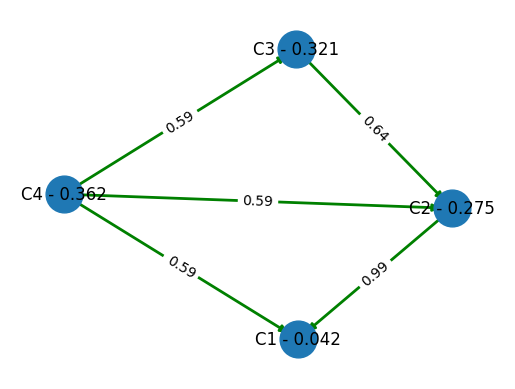

In [5]:
######## Visualization using networkx
G = nx.Graph()
for i in range(c_no-1):
    #G.add_weighted_edges_from([(criteria_name[index[i]], criteria_name[index[i+1]], round(probs[index[i], index[i+1]], 2) )])
    G.add_edge( criteria_name[index[i]], criteria_name[index[i+1]], weight=round(probs[index[i], index[i+1]], 2) )
    for j in range(i+2, c_no):
        if probs[index[i], index[j]] < 1 and probs[index[i], index[j]] > 0.5:
            #G.add_weighted_edges_from([(criteria_name[index[i]], criteria_name[index[j]], round(probs[index[i], index[j]], 2))])
            G.add_edge(criteria_name[index[i]], criteria_name[index[j]], weight=round(probs[index[i], index[i+1]], 2) )

edge_labels = nx.get_edge_attributes(G, "weight")

pos = nx.spring_layout(G, seed=7)
nx.draw_networkx_nodes(G, pos, node_size = 700)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, arrows=True, width=2, edge_color='green')
nx.draw_networkx_edge_labels(G, pos, edge_labels)
# edge weight labels


ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
#plt.tight_layout()
plt.show()

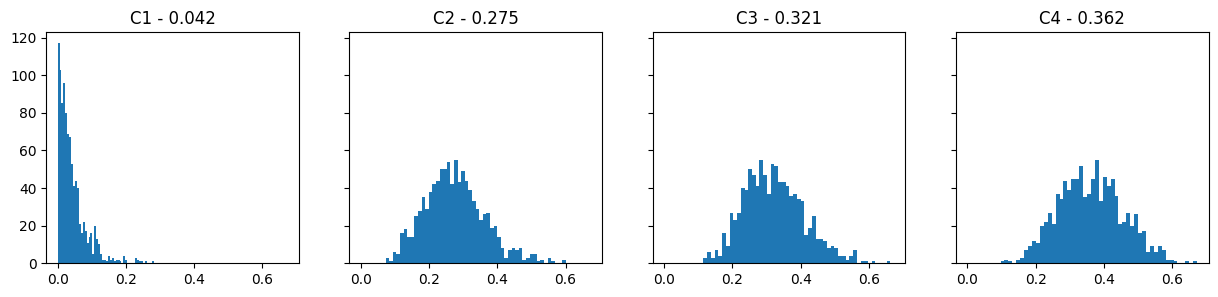

In [6]:
## Plotting histogram
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,c_no, sharey=True, sharex=True, figsize = (15,3))
for i in range(c_no):
    plt.subplot(1, c_no, i+1)
    plt.hist(weights[:,i], bins=50)
    plt.title(criteria_name[i])

plt.show()